## 데이터 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

root = '/content/drive/MyDrive/instacart/instacart-market-basket-analysis/'

In [3]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv', 
                     dtype={
                        'order_id': np.int32,
                        'user_id': np.int64,
                        'eval_set': 'category',
                        'order_number': np.int16,
                        'order_dow': np.int8,
                        'order_hour_of_day': np.int8,
                        'days_since_prior_order': np.float32})
order_products_prior = pd.read_csv(root + 'order_products__prior.csv', 
                                   dtype={
                                       'order_id': np.int32,
                                       'product_id': np.uint16,
                                       'add_to_cart_order': np.int16,
                                       'reordered': np.int8})
order_products_train = pd.read_csv(root + 'order_products__train.csv', 
                                   dtype={                                       
                                       'order_id': np.int32,
                                       'product_id': np.uint16,
                                       'add_to_cart_order': np.int16,
                                       'reordered': np.int8})
products = pd.read_csv(root + 'products.csv', 
                       dtype={
                           'product_id': np.uint16,
                           'aisle_id': np.uint8,
                           'department_id': np.uint8})
sample_submission = pd.read_csv(root + 'sample_submission.csv')

## 데이터 확인

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [12]:
orders.user_id.nunique()

206209

첫번째 주문은 이전 주문이 없기 때문에 총 고객의 수만큼의 결측치가 존재.

In [13]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [15]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [17]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [19]:
sample_submission.isna().sum()

order_id    0
products    0
dtype: int64

##order_products
분석을 위해 order_products_train과 order_products_prior를 병합하여 새로운 데이터프레임을 생성

In [26]:
order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [28]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [29]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [30]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [44]:
# 빠른 분석을 위해 리소스 메모리를 줄여주는 함수
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [45]:
order_products = reduce_memory(order_products)

Memory usage of properties dataframe is : 4128.308837890625  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2031.902006149292  MB
This is  49.21875 % of the initial size


## 데이터 분석

### Aisles

In [31]:
data=order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
data=data.sort_values('total', ascending=False).reset_index()

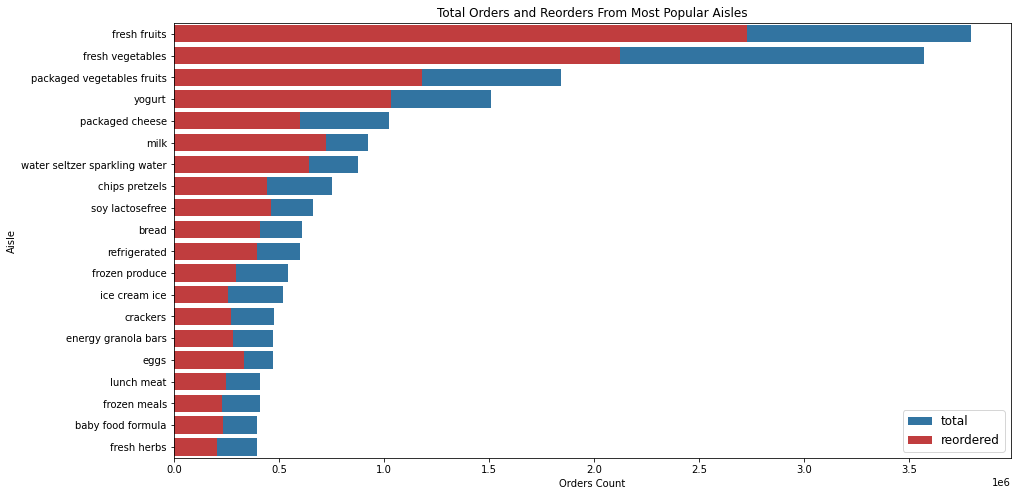

In [33]:
# 인기있는 소분류들의 총 주문수와 재주문수
fig, ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(y=data.aisle[0:20], x=data.total[0:20], color=color[0], label="total")
ax=sns.barplot(y=data.aisle[0:20], x=data.reorders[0:20], color=color[3], label="reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size':12})
plt.show()

주문량이 많은 소분류는 재주문되는 횟수도 많았고, 총 주문과 재주문 비율이 유사한 추이를 보였다. 하지만 packaged cheese, milk같은 예외도 존재했다.

### Departments

In [34]:
data=order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
data=data.sort_values('total', ascending=False).reset_index()

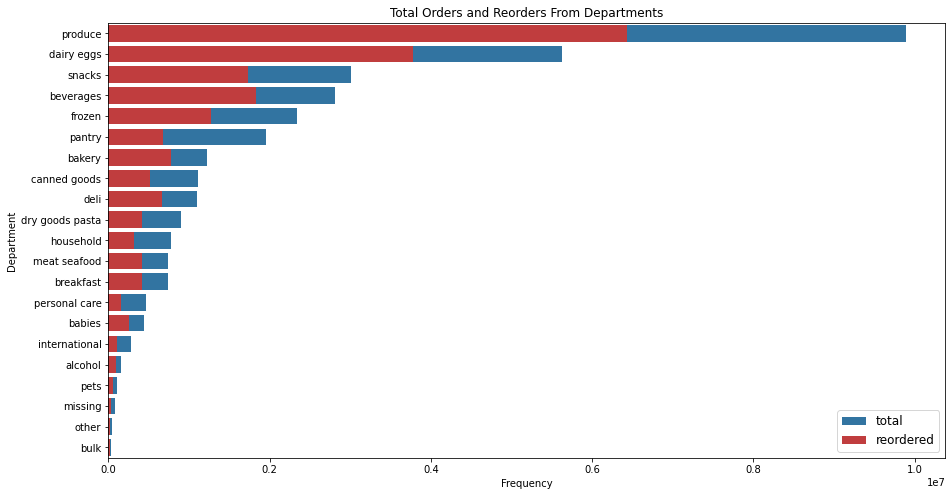

In [35]:
# 대분류의 총 주문수와 재주문수
fig, ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(y=data.department, x=data["total"], color=color[0], label="total")
ax=sns.barplot(y=data.department, x=data["reorders"], color=color[3], label="reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc=4, prop={'size':12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

소분류와 마찬가지로 주문량이 대분류가 재주문되는 횟수도 많았고, 총 주문과 재주문 비율이 유사한 추이를 보였다. 하지만 pantry같은 예외도 존재했다.pantry는 식료품 저장고에 들어가는 통조림, 과자류, 곡물 등의 카테고리인데, 재주문되는 비율이 낮은 것을 알 수 있다.금방금방 떨어지는 제품들이 아니라서 그런 것으로 추측된다.

### Products

In [36]:
data=order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
data=data.sort_values('total', ascending=False).reset_index()

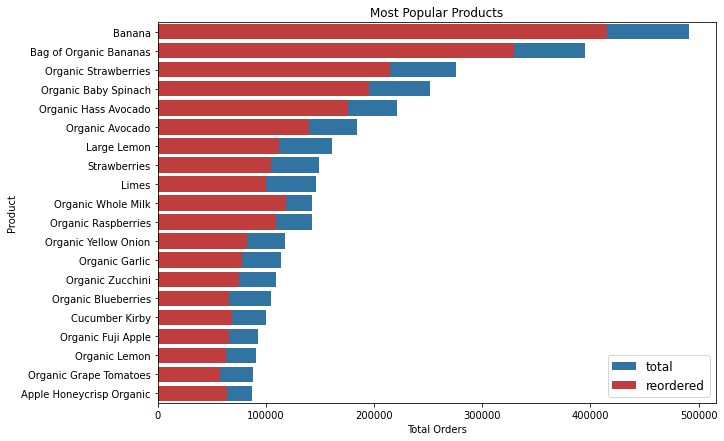

In [37]:
# 가장 인기있는 제품들
fig, ax=plt.subplots(figsize=(10,7))
ax=sns.barplot(y=data.product_name[0:20], x=data.total[0:20], color=color[0], label="total")
ax=sns.barplot(y=data.product_name[0:20], x=data.reorders[0:20], color=color[3], label="reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc=4, prop={'size':12})
plt.show()

In [42]:
data["reorder_ratio"]=data.reorders/data.total
data.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


재주문율이 가장 높은 제품은 생 야채 포장지이다. 자주 쓰는 소모품이라 그런 것으로 추측된다.
두 번째는 생리대이다. 생필품이고 소모품이므로 많이 재주문하는것으로 보인다.

In [39]:
# 제품을 구매한 유저
product_unique_users=order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


바나나를 가장 많은 유저가 구매하였다. 순위권에 유기농 제품이 아주 많은 것을 알 수 있다.

In [43]:
product_unique_users=product_unique_users.merge(data, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head()

,product_name,total_users,total_x,reorders_x,reorder_ratio_x,total_y,reorders_y,reorder_ratio_y,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029,69,65,0.942029,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333,90,84,0.933333,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077,13,12,0.923077,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569,102,94,0.921569,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286,35,32,0.914286,35,32,0.914286


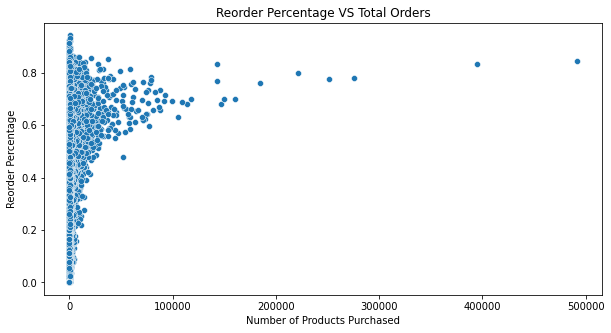

In [ ]:
# 총 주문 대비 재주문율
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x=product_unique_users.total, y=product_unique_users.reorder_ratio)
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

소규모 구매에서는 재주문율이 60%주변으로 고르게 분포되어있고, 400000이나 500000의 대규모 주문의 경우 재주문율이 80%정도로 높은 것을 알 수 있다.

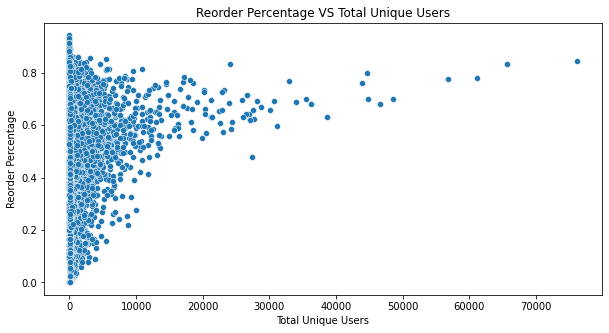

In [ ]:
# 재주문 비율 대 총 유저
fig, ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x=product_unique_users.total_users, y=product_unique_users.reorder_ratio)
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

In [ ]:
# 유기농 vs 비 유기농
product_unique_users['Organic']=product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265.0,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3.0,0.214286,False
2,#2 Mechanical Pencils,9,9,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90.0,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93.0,0.534483,False


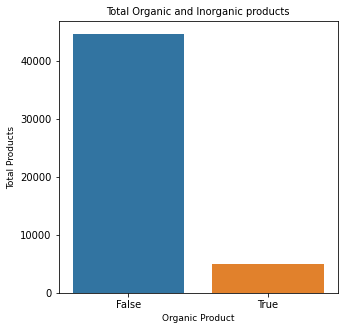

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax=sns.barplot(x=product_unique_users.groupby('Organic').size().index, y=product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size=9)
ax.set_ylabel("Total Products", size=9)
ax.set_title("Total Organic and Inorganic products", size=10)
plt.show()

전체 제품 중 유기농 제품의 비율이 낮은 것을 알 수 있다.

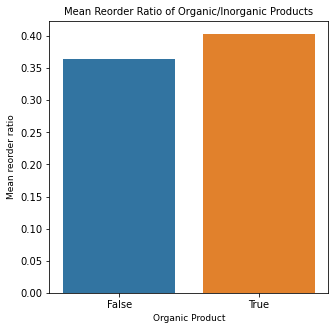

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax=sns.barplot(x=product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y=product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size=9)
ax.set_ylabel("Mean reorder ratio", size=9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

유기농제품의 재주문율이 더 높은 것을 알 수 있다.

In [ ]:
# 장바구니에 추가한 주문 대비 재주문
data=order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
data.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


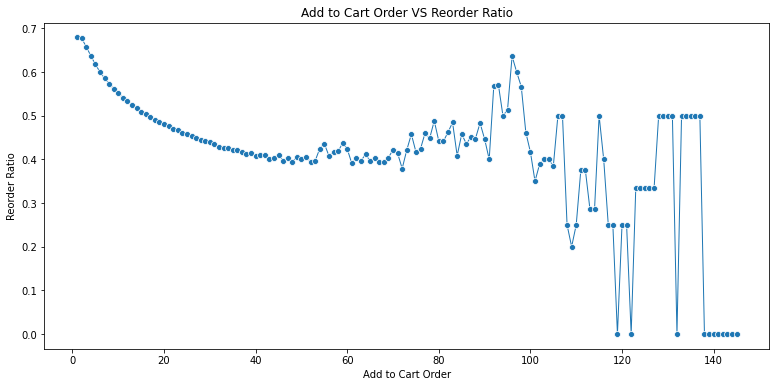

In [ ]:
fig, ax=plt.subplots(figsize=(13,6))
ax=sns.lineplot(x=data.add_to_cart_order, y=data.reordered, lw=1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

장바구니에 먼저 추가한 제품일수록 재주문율이 높았다.

In [ ]:
# 요일별 인기제품
data=order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
data=data.sort_values(['order_dow', 'counts'], ascending=[True, False])
data=data.groupby('order_dow').head(5).reset_index(drop=True)

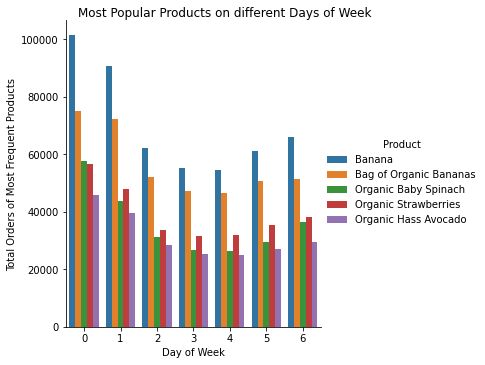

In [ ]:
ax=sns.catplot(x="order_dow", y="counts", hue="product_name", data=data, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

요일별 가장 많이 주문하는 제품은 주로 과일, 채소류이다.